# Linear Regression

## Data Loading

In [1]:
# Importing the libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading data into csv
df = pd.read_csv(r'D:\Machine learning\ML rar\ML LR\car pred/CarPrice.csv')

## Data Prepartaion

In [3]:
#Creating 2 separate lists for categorical and numerical variables

Categorical_vars = ['symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype',
       'cylindernumber','fuelsystem']

Numerical_vars = ['price','wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [4]:
#Finding percentage of null values in the data frame
round((df.isnull().sum()/len(df))*100,2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
#Adding Company name from the carName
df['Company_Name']=df['CarName'].str.split(" ", 1, expand = True)[0].str.lower()

In [6]:
df.Company_Name.value_counts()

toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
maxda           2
vw              2
renault         2
vokswagen       1
toyouta         1
mercury         1
porcshce        1
Name: Company_Name, dtype: int64

In [7]:
df['Company_Name'] = df['Company_Name'].replace(to_replace ="toyouta", 
                 value ="toyota")
df['Company_Name'] = df['Company_Name'].replace(to_replace ="maxda", 
                 value ="mazda")
df['Company_Name'] = df['Company_Name'].replace(to_replace ="vokswagen", 
                 value ="volkswagen")
df['Company_Name'] = df['Company_Name'].replace(to_replace ="porcshce", 
                 value ="porsche")

In [8]:
# Creating a dummy variable for  the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['symboling', 'Company_Name', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype',
       'cylindernumber','fuelsystem']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [9]:
Categorical_vars = ['symboling', 'Company_Name', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype',
       'cylindernumber','fuelsystem']

In [10]:
df=df.drop(Categorical_vars,axis=1)

In [11]:
df=df.drop(['car_ID','CarName'],axis=1)

### Splitting the Data into Training and Testing Sets

In [12]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 150)

#### Rescaling the Features

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[Numerical_vars] = scaler.fit_transform(df_train[Numerical_vars])

In [14]:
df_train.shape

(143, 65)

In [15]:
y_train = df_train.pop('price')
X_train = df_train

### Model Building

#### Feature Selection Using RFE

In [16]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [17]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [18]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 8),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 6),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 20),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 14),
 ('peakrpm', True, 1),
 ('citympg', False, 11),
 ('highwaympg', False, 10),
 ('Company_Name_audi', False, 22),
 ('Company_Name_bmw', True, 1),
 ('Company_Name_buick', True, 1),
 ('Company_Name_chevrolet', False, 19),
 ('Company_Name_dodge', False, 9),
 ('Company_Name_honda', False, 21),
 ('Company_Name_isuzu', False, 26),
 ('Company_Name_jaguar', True, 1),
 ('Company_Name_mazda', False, 29),
 ('Company_Name_mercury', False, 28),
 ('Company_Name_mitsubishi', False, 7),
 ('Company_Name_nissan', False, 27),
 ('Company_Name_peugeot', False, 17),
 ('Company_Name_plymouth', False, 16),
 ('Company_Name_porsche', True, 1),
 ('Company_Name_renault', False, 34),
 ('Company_Name_saab', True, 1),
 ('Company_Name_subaru', True, 1),
 ('Compan

In [20]:
col = X_train.columns[rfe.support_]
col

Index(['carlength', 'carwidth', 'curbweight', 'enginesize', 'stroke',
       'compressionratio', 'peakrpm', 'Company_Name_bmw', 'Company_Name_buick',
       'Company_Name_jaguar', 'Company_Name_porsche', 'Company_Name_saab',
       'Company_Name_subaru', 'Company_Name_volvo', 'fueltype_gas',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'fuelsystem_4bbl', 'fuelsystem_idi'],
      dtype='object')

#### Building model using statsmodel

##### Model1 : Building Model on the basis of the columns selected in RFE

In [21]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [22]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [23]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     150.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.49e-77
Time:                        16:36:01   Log-Likelihood:                 284.82
No. Observations:                 143   AIC:                            -513.6
Df Residuals:                     115   BIC:                            -430.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

In [24]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,fuelsystem_4bbl,inf
23,enginetype_rotor,inf
21,enginetype_ohcf,inf
19,enginelocation_rear,inf
12,Company_Name_subaru,inf
14,fueltype_gas,629.88
29,fuelsystem_idi,221.81
25,cylindernumber_four,87.26
5,compressionratio,79.27
3,enginesize,40.13


##### Model 2

In [25]:
#Removing fueltype_gas as its VIF and p-value is very high
X_train_new = X_train_rfe.drop(["fueltype_gas"], axis = 1)

In [26]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     150.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.49e-77
Time:                        16:36:02   Log-Likelihood:                 284.82
No. Observations:                 143   AIC:                            -513.6
Df Residuals:                     115   BIC:                            -430.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.40

In [27]:
#Calculating VIF
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Company_Name_subaru,inf
27,fuelsystem_4bbl,inf
22,enginetype_rotor,inf
20,enginetype_ohcf,inf
18,enginelocation_rear,inf
5,compressionratio,115.53
28,fuelsystem_idi,85.89
0,carlength,81.03
2,curbweight,74.42
3,enginesize,71.61


##### Model 3

In [28]:
#Removing Company_Name_subaru as its VIF is very high
X_train_new = X_train_new.drop(["Company_Name_subaru"], axis = 1)

In [29]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     150.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.49e-77
Time:                        16:36:02   Log-Likelihood:                 284.82
No. Observations:                 143   AIC:                            -513.6
Df Residuals:                     115   BIC:                            -430.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.40

In [30]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,fuelsystem_4bbl,inf
21,enginetype_rotor,inf
5,compressionratio,115.53
27,fuelsystem_idi,85.89
0,carlength,81.03
2,curbweight,74.42
3,enginesize,71.61
23,cylindernumber_four,67.82
4,stroke,47.10
1,carwidth,35.93


##### Model 4

In [31]:
#Removing fuelsystem_4bbl
X_train_new = X_train_new.drop(["fuelsystem_4bbl"], axis = 1)

In [32]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     150.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.49e-77
Time:                        16:36:02   Log-Likelihood:                 284.82
No. Observations:                 143   AIC:                            -513.6
Df Residuals:                     115   BIC:                            -430.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.40

In [33]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,compressionratio,115.53
26,fuelsystem_idi,85.89
0,carlength,81.03
2,curbweight,74.42
3,enginesize,71.61
23,cylindernumber_four,67.82
4,stroke,47.10
1,carwidth,35.93
15,carbody_sedan,21.34
14,carbody_hatchback,16.61


##### Model 5

In [34]:
#Removing compressionratio
X_train_new = X_train_new.drop(["compressionratio"], axis = 1)

In [35]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     146.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.31e-76
Time:                        16:36:03   Log-Likelihood:                 280.03
No. Observations:                 143   AIC:                            -506.1
Df Residuals:                     116   BIC:                            -426.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

In [36]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carlength,76.40
3,enginesize,68.57
2,curbweight,51.82
22,cylindernumber_four,45.40
4,stroke,42.62
1,carwidth,35.93
14,carbody_sedan,21.19
13,carbody_hatchback,16.54
23,cylindernumber_six,10.18
5,peakrpm,9.19


##### Model 6

In [37]:
#Removing carlength
X_train_new = X_train_new.drop(["carlength"], axis = 1)

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     139.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.22e-75
Time:                        16:36:03   Log-Likelihood:                 272.98
No. Observations:                 143   AIC:                            -494.0
Df Residuals:                     117   BIC:                            -416.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [39]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,61.26
1,curbweight,45.39
21,cylindernumber_four,43.61
3,stroke,41.66
0,carwidth,29.03
13,carbody_sedan,19.15
12,carbody_hatchback,16.36
22,cylindernumber_six,10.17
4,peakrpm,9.14
14,carbody_wagon,6.56


##### Model 7

In [40]:
#Removing enginetype_ohcf
X_train_new = X_train_new.drop(["enginetype_ohcf"], axis = 1)

In [41]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     144.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.64e-76
Time:                        16:36:04   Log-Likelihood:                 272.04
No. Observations:                 143   AIC:                            -494.1
Df Residuals:                     118   BIC:                            -420.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

In [42]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,51.46
1,curbweight,40.83
20,cylindernumber_four,36.34
0,carwidth,29.02
3,stroke,24.30
13,carbody_sedan,18.13
12,carbody_hatchback,15.73
21,cylindernumber_six,9.44
4,peakrpm,8.95
14,carbody_wagon,5.95


##### Model 8

In [43]:
#Removing stroke
X_train_new = X_train_new.drop(["stroke"], axis = 1)

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     149.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.92e-77
Time:                        16:36:04   Log-Likelihood:                 271.22
No. Observations:                 143   AIC:                            -494.4
Df Residuals:                     119   BIC:                            -423.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

In [45]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,39.05
2,enginesize,38.99
19,cylindernumber_four,33.53
0,carwidth,28.82
12,carbody_sedan,17.63
11,carbody_hatchback,14.97
20,cylindernumber_six,9.22
3,peakrpm,8.43
13,carbody_wagon,5.81
14,enginelocation_rear,5.45


##### Model 9

In [46]:
#Removing fuelsystem_idi 
X_train_new = X_train_new.drop(["fuelsystem_idi"], axis = 1)

In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     158.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.26e-78
Time:                        16:36:04   Log-Likelihood:                 271.18
No. Observations:                 143   AIC:                            -496.4
Df Residuals:                     120   BIC:                            -428.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

In [48]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,37.86
2,enginesize,37.15
19,cylindernumber_four,31.74
0,carwidth,28.77
12,carbody_sedan,17.61
11,carbody_hatchback,14.95
20,cylindernumber_six,8.88
3,peakrpm,6.85
13,carbody_wagon,5.79
14,enginelocation_rear,5.41


##### Model 10

In [49]:
#Removing enginesize
X_train_new = X_train_new.drop(["enginesize"], axis = 1)

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm_final = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     162.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.76e-78
Time:                        16:36:05   Log-Likelihood:                 269.27
No. Observations:                 143   AIC:                            -494.5
Df Residuals:                     121   BIC:                            -429.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.43

In [51]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,cylindernumber_four,31.64
0,carwidth,27.48
1,curbweight,25.84
11,carbody_sedan,17.46
10,carbody_hatchback,14.65
19,cylindernumber_six,8.81
2,peakrpm,6.82
12,carbody_wagon,5.76
6,Company_Name_porsche,5.37
13,enginelocation_rear,5.22


#### Model 11

In [52]:
#Removing enginetype_ohcv
X_train_new = X_train_new.drop(["enginetype_ohcv"], axis = 1)

In [53]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     169.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.12e-79
Time:                        16:36:05   Log-Likelihood:                 268.46
No. Observations:                 143   AIC:                            -494.9
Df Residuals:                     122   BIC:                            -432.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.41

In [54]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,cylindernumber_four,28.97
0,carwidth,27.25
1,curbweight,25.80
11,carbody_sedan,16.99
10,carbody_hatchback,14.33
18,cylindernumber_six,8.47
2,peakrpm,6.51
12,carbody_wagon,5.69
6,Company_Name_porsche,5.35
13,enginelocation_rear,5.03


#### Model 12

In [55]:
#Removing cylindernumber_four as its VIF is very high
X_train_new = X_train_new.drop(["cylindernumber_four"], axis = 1)

In [56]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     112.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.74e-68
Time:                        16:36:05   Log-Likelihood:                 236.25
No. Observations:                 143   AIC:                            -432.5
Df Residuals:                     123   BIC:                            -373.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

In [57]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,26.94
1,curbweight,24.11
11,carbody_sedan,6.44
2,peakrpm,5.92
6,Company_Name_porsche,5.34
10,carbody_hatchback,4.97
13,enginelocation_rear,4.92
12,carbody_wagon,2.82
17,cylindernumber_six,2.36
5,Company_Name_jaguar,2.34


#### Model 13

In [58]:
#Removing enginetype_dohcv
X_train_new = X_train_new.drop(["enginetype_dohcv"], axis = 1)

In [59]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     119.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.85e-69
Time:                        16:36:06   Log-Likelihood:                 236.08
No. Observations:                 143   AIC:                            -434.2
Df Residuals:                     124   BIC:                            -377.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

In [60]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,26.51
1,curbweight,24.08
11,carbody_sedan,6.33
2,peakrpm,5.90
10,carbody_hatchback,4.89
13,enginelocation_rear,3.59
6,Company_Name_porsche,3.16
12,carbody_wagon,2.79
16,cylindernumber_six,2.36
5,Company_Name_jaguar,2.34


#### Model 14

In [61]:
#Removing enginetype_rotor
X_train_new = X_train_new.drop(["enginetype_rotor"], axis = 1)

In [62]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     127.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.71e-70
Time:                        16:36:06   Log-Likelihood:                 235.98
No. Observations:                 143   AIC:                            -436.0
Df Residuals:                     125   BIC:                            -382.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.01

In [63]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,26.44
1,curbweight,24.08
11,carbody_sedan,6.14
2,peakrpm,5.62
10,carbody_hatchback,4.86
13,enginelocation_rear,3.58
6,Company_Name_porsche,3.13
12,carbody_wagon,2.74
15,cylindernumber_six,2.34
5,Company_Name_jaguar,2.34


#### Model 15

In [64]:
#Removing cylindernumber_twelve
X_train_new = X_train_new.drop(["cylindernumber_twelve"], axis = 1)

In [65]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     136.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.31e-71
Time:                        16:36:06   Log-Likelihood:                 235.97
No. Observations:                 143   AIC:                            -437.9
Df Residuals:                     126   BIC:                            -387.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0188 

In [66]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,26.35
1,curbweight,24.07
11,carbody_sedan,6.09
2,peakrpm,5.60
10,carbody_hatchback,4.83
13,enginelocation_rear,3.55
6,Company_Name_porsche,3.12
12,carbody_wagon,2.73
15,cylindernumber_six,2.23
4,Company_Name_buick,1.91


#### Model 16

In [67]:
#Removing Company_Name_saab
X_train_new = X_train_new.drop(["Company_Name_saab"], axis = 1)

In [68]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     144.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.96e-72
Time:                        16:36:07   Log-Likelihood:                 234.86
No. Observations:                 143   AIC:                            -437.7
Df Residuals:                     127   BIC:                            -390.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0145 

In [69]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,26.33
1,curbweight,23.70
10,carbody_sedan,6.08
2,peakrpm,5.56
9,carbody_hatchback,4.80
12,enginelocation_rear,3.55
6,Company_Name_porsche,3.11
11,carbody_wagon,2.69
14,cylindernumber_six,2.19
4,Company_Name_buick,1.90


#### Model 17

In [70]:
#Removing cylindernumber_six
X_train_new = X_train_new.drop(["cylindernumber_six"], axis = 1)

In [71]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     153.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.12e-73
Time:                        16:36:07   Log-Likelihood:                 234.04
No. Observations:                 143   AIC:                            -438.1
Df Residuals:                     128   BIC:                            -393.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0074 

In [72]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,25.81
1,curbweight,20.25
10,carbody_sedan,5.91
2,peakrpm,5.54
9,carbody_hatchback,4.77
12,enginelocation_rear,3.24
6,Company_Name_porsche,3.07
11,carbody_wagon,2.56
4,Company_Name_buick,1.83
8,carbody_hardtop,1.78


#### Model 18

In [73]:
#Removing carwidth
X_train_new = X_train_new.drop(["carwidth"], axis = 1)

In [74]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     126.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.09e-66
Time:                        16:36:08   Log-Likelihood:                 215.42
No. Observations:                 143   AIC:                            -402.8
Df Residuals:                     129   BIC:                            -361.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0128 

In [75]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,6.46
1,peakrpm,5.52
9,carbody_sedan,5.02
8,carbody_hatchback,3.95
11,enginelocation_rear,2.90
5,Company_Name_porsche,2.77
10,carbody_wagon,2.50
3,Company_Name_buick,1.82
7,carbody_hardtop,1.69
12,cylindernumber_five,1.42


#### Model 19

In [76]:
#Removing cylindernumber_five
X_train_new = X_train_new.drop(["cylindernumber_five"], axis = 1)

In [77]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     137.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.62e-68
Time:                        16:36:08   Log-Likelihood:                 215.36
No. Observations:                 143   AIC:                            -404.7
Df Residuals:                     130   BIC:                            -366.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0138 

In [78]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,6.42
1,peakrpm,5.40
9,carbody_sedan,5.02
8,carbody_hatchback,3.88
11,enginelocation_rear,2.90
5,Company_Name_porsche,2.77
10,carbody_wagon,2.50
7,carbody_hardtop,1.68
3,Company_Name_buick,1.55
4,Company_Name_jaguar,1.25


#### Model 20

In [79]:
#Removing carbody_hardtop
X_train_new = X_train_new.drop(["carbody_hardtop"], axis = 1)

In [80]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     148.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.96e-68
Time:                        16:36:08   Log-Likelihood:                 213.87
No. Observations:                 143   AIC:                            -403.7
Df Residuals:                     131   BIC:                            -368.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0223 

In [81]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,5.93
1,peakrpm,4.96
8,carbody_sedan,4.40
7,carbody_hatchback,3.48
5,Company_Name_porsche,2.75
10,enginelocation_rear,2.73
9,carbody_wagon,2.27
3,Company_Name_buick,1.47
4,Company_Name_jaguar,1.24
6,Company_Name_volvo,1.19


#### Model 21

In [82]:
#Removing carbody_sedan
X_train_new = X_train_new.drop(["carbody_sedan"], axis = 1)

In [83]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     159.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.25e-68
Time:                        16:36:09   Log-Likelihood:                 212.01
No. Observations:                 143   AIC:                            -402.0
Df Residuals:                     132   BIC:                            -369.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0578 

In [84]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,3.88
1,peakrpm,2.99
5,Company_Name_porsche,2.66
9,enginelocation_rear,2.63
7,carbody_hatchback,1.76
3,Company_Name_buick,1.40
8,carbody_wagon,1.39
4,Company_Name_jaguar,1.22
6,Company_Name_volvo,1.19
2,Company_Name_bmw,1.15


### Final Model

In [85]:
#Removing carbody_hatchback
X_train_new = X_train_new.drop(["carbody_hatchback"], axis = 1)

In [86]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm_final = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     159.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.25e-68
Time:                        16:36:09   Log-Likelihood:                 212.01
No. Observations:                 143   AIC:                            -402.0
Df Residuals:                     132   BIC:                            -369.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0578 

In [87]:
X_train_new.columns

Index(['curbweight', 'peakrpm', 'Company_Name_bmw', 'Company_Name_buick',
       'Company_Name_jaguar', 'Company_Name_porsche', 'Company_Name_volvo',
       'carbody_wagon', 'enginelocation_rear'],
      dtype='object')

###### Now all the p-values and the VIF are low so we will consider this as final model and will Predict test using this

#### Residual Analysis

In [88]:
y_train_price = lm_final.predict(X_train_lm)

Text(0.5, 0, 'Errors')

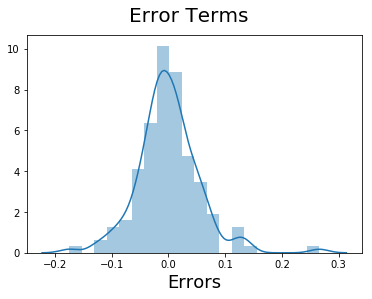

In [89]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##### Final Prediction

In [90]:
df_test[Numerical_vars] = scaler.transform(df_test[Numerical_vars])

In [91]:
y_test = df_test.pop('price')
X_test = df_test

In [92]:
X_test_mf = X_test[['curbweight', 'peakrpm', 'Company_Name_bmw', 'Company_Name_buick',
       'Company_Name_jaguar', 'Company_Name_porsche', 'Company_Name_volvo',
       'carbody_wagon', 'enginelocation_rear']]

In [93]:
X_test_mf = sm.add_constant(X_test_mf)

In [94]:
y_pred_mf = lm_final.predict(X_test_mf)

In [95]:
# R2 value for the test data is 0.89

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_mf)

0.8916526969397395

In [96]:
#Calculating RMSE
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred_mf))

0.0041390779192458345


Text(0, 0.5, 'y_pred')

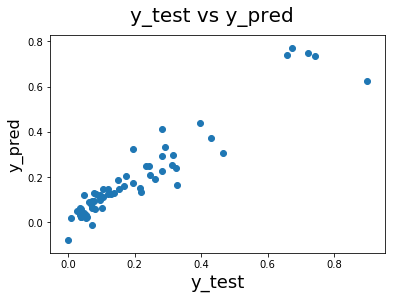

In [97]:
#Plotting a graph between y_test and y_pred

fig = plt.figure()
plt.scatter(y_test, y_pred_mf)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     